In [1]:
from tensorflow import keras
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.activations import leaky_relu 
from keras.preprocessing.image import ImageDataGenerator         
from keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
def FCN_model(len_classes=3, shape=(227, 227, 1), dropout_rate=0.2):
    model = keras.models.Sequential()

    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", input_shape=shape))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1))
    # model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=2))
    # model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=2))
    # model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))

    model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=2))
    model.add(keras.layers.Dropout(dropout_rate))
    # model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))

    model.add(keras.layers.Conv2D(filters=math.ceil(math.log(len_classes,2)), kernel_size=1, strides=1))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.GlobalMaxPooling2D())
    model.add(keras.layers.Activation('sigmoid'))

    print(model.summary())
    print(f'Total number of layers: {len(model.layers)}')

    return model
fcn0=FCN_model(len_classes=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 225, 225, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 225, 225, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 111, 111, 64)      0

In [3]:
image_shape=(227,227)
train_dir="/notebooks/ultrasound_50_referred/trainval"
validation_dir=train_dir
test_dir="/notebooks/ultrasound_50_referred/test"
batch_size=64
test_train_split=0.3

train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=image_shape ,\
      subset='training',seed=5, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=image_shape, subset='validation',seed=5,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=image_shape, batch_size=batch_size)

Found 3200 files belonging to 2 classes.
Using 2240 files for training.
Found 3200 files belonging to 2 classes.
Using 960 files for validation.
Found 200 files belonging to 2 classes.


In [5]:
fcn0.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [6]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [7]:
history = fcn0.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
35/35 [==============================] - 9s 150ms/step - loss: 0.6286 - binary_accuracy: 0.6433 - val_loss: 0.7812 - val_binary_accuracy: 0.5010
Epoch 2/100
35/35 [==============================] - 5s 143ms/step - loss: 0.4662 - binary_accuracy: 0.8366 - val_loss: 0.5792 - val_binary_accuracy: 0.6875
Epoch 3/100
35/35 [==============================] - 5s 146ms/step - loss: 0.4219 - binary_accuracy: 0.8759 - val_loss: 0.5100 - val_binary_accuracy: 0.6958
Epoch 4/100
35/35 [==============================] - 5s 148ms/step - loss: 0.3912 - binary_accuracy: 0.8942 - val_loss: 0.4964 - val_binary_accuracy: 0.8333
Epoch 5/100
35/35 [==============================] - 5s 142ms/step - loss: 0.3786 - binary_accuracy: 0.8996 - val_loss: 0.9801 - val_binary_accuracy: 0.5021
Epoch 6/100
35/35 [==============================] - 5s 145ms/step - loss: 0.3691 - binary_accuracy: 0.9013 - val_loss: 0.9990 - val_binary_accuracy: 0.5042
Epoch 7/100
35/35 [==============================] - 6s 15

In [8]:
epochs_run=len(history.epoch)

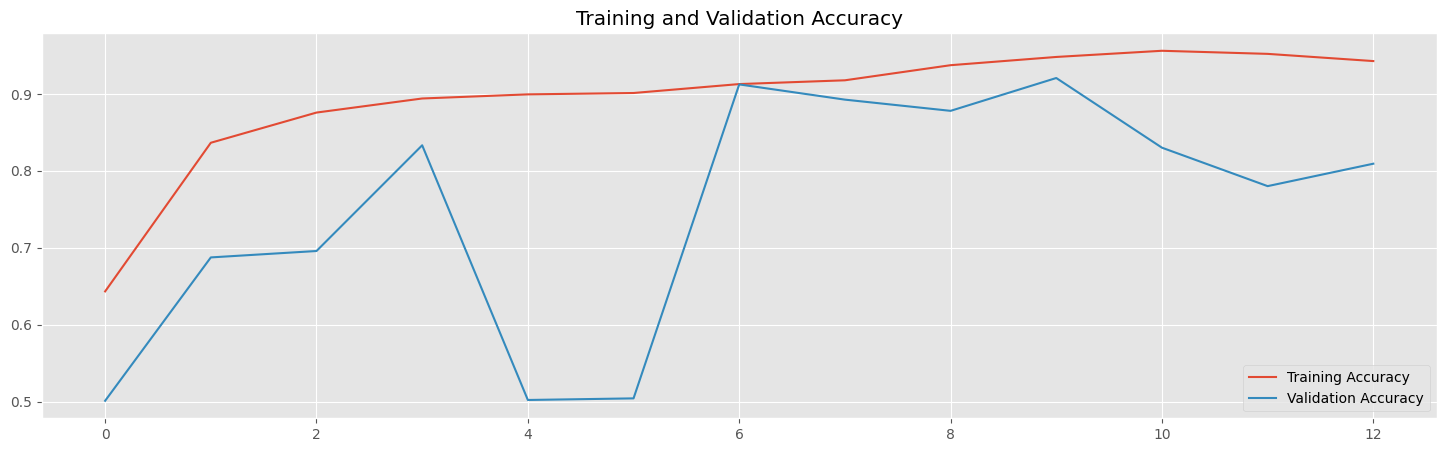

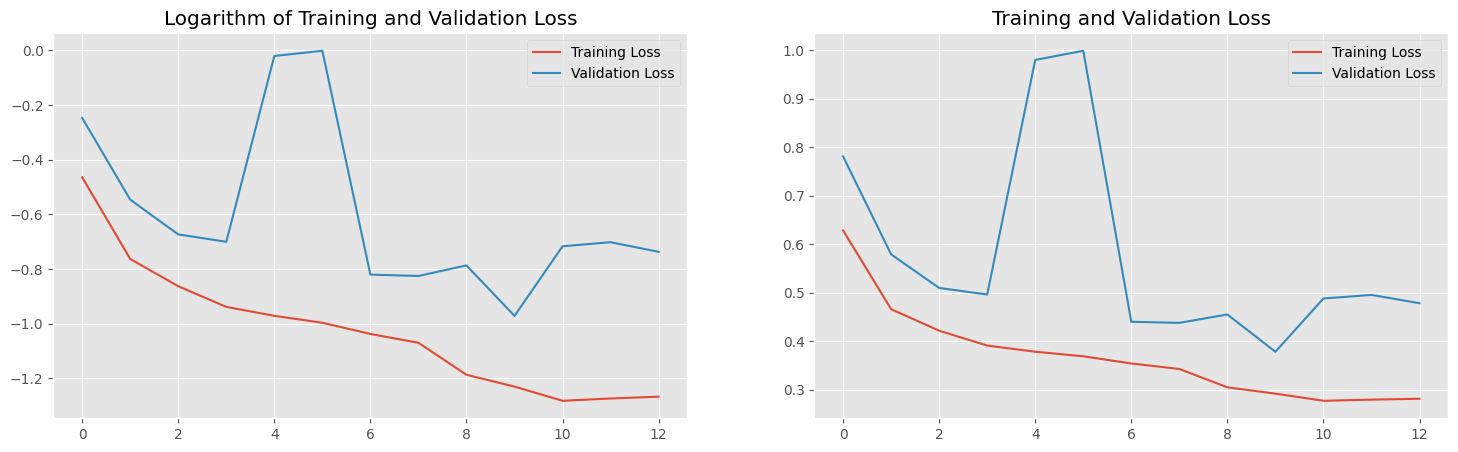

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()


In [10]:
results = fcn0.evaluate(test_data)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 44ms/step - loss: 0.4648 - binary_accuracy: 0.8100
test loss, test acc: [0.4648244380950928, 0.8100000023841858]
